## Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,  roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn import set_config
set_config(display='diagram')
import shap

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('/content/Dataset.csv')
df_copy = df.copy()
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State: The state where a customer comes from
- Account length: Number of days a customer has been using services
- Area code: The area where a customer comes from
- Phone number: The phone number of a customer
- International plan: The status of customer international plan
- Voicemail plan: The status of customer voicemail plan
- No. vmail msgs: Number of voicemail message sent by a customer
- Total day minutes: Total call minutes spent by a customer during day time
- Total day calls: Total number of calls made by a customer during day time
- Total day charge: Total amount charged to a customer during day time
- Total eve minutes: Total call minutes spent by a customer during evening time
- Total eve calls: Total number of calls made by a customer during evening time
- Total eve charge: Total amount charged to a customer during evening time
- Total night minutes: Total call minutes spent by a customer during night time
- Total night calls: Total number of calls made by a customer during night time
- Total night charge: Total amount charged to a customer during night time
- Total intl minutes: Total international call minutes spent by a customer
- Total intl calls: Total number of international calls made by a customer
- Total int charge: Total international call amount charged to a customer
- Customer service calls: Total number of customer service calls made by a customer
- Churn: Whether a customer is churned or not


## Initial Inspection

- shape
- data types
- missing values
- duplicate values
- summary statistics
- outlier detection
- class balance

### shape

In [3]:
df.shape

(3333, 21)

### data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### missing values

In [5]:
df.isna().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


### duplicate values

In [6]:
df.duplicated().sum()

0

### summary statistics

In [7]:
# summary statistics: numerical variables
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# summary statistics: categorical variables
df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


### Outlier Detection

In [9]:
def detect_outliers_iqr(df): # Function to detect outliers based on IQR
    outlier_count = {}
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count

# Detect outliers in all numeric columns
outliers_iqr = detect_outliers_iqr(df)
outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'Number of Outliers'])
outliers_df

,Column,Number of Outliers
0,account length,18
1,area code,0
2,number vmail messages,1
3,total day minutes,25
4,total day calls,23
5,total day charge,25
6,total eve minutes,24
7,total eve calls,20
8,total eve charge,24
9,total night minutes,30


### class balance

Class Balance in dataframe (as percentages):
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


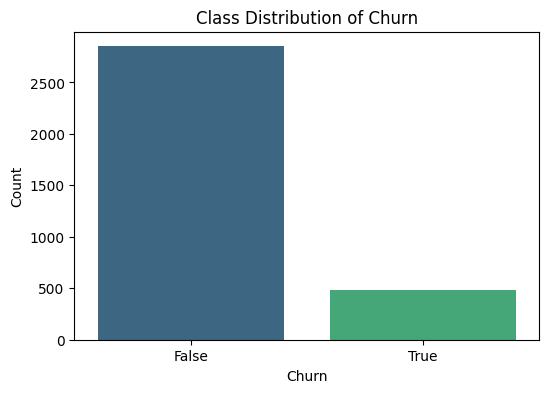

In [10]:
class_balance = df['churn'].value_counts(normalize=True) * 100
print("Class Balance in dataframe (as percentages):")
print(class_balance)

# Plot the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Based on initial inspection, we can conclude that:
1. There are 3333 observations, each unique (no duplicates & all phone numbers unique), 20 features and 1 target variable (Churn).
2. None of the columns have any missing data.
3. The data types of all features are correct except "area code" which can be seen when we describe the numerical features. Mean "area code" doesn't make any sense and hence this data type must be changed in data pre-processing stage.
4. Most phone numbers belong to Wyoming (WY) state.
5. 3010 out of 3333 (90%) people don't have international plan and 2411 out of 3333 (72%) don't have voice mail plan.
6. Majority of columns have outliers. We need to handle them so that certain models don't get affected by outliers.
7. We have highly imbalanced dataset: 85.5% customers didn't Churn while only 14.5% did. Thus:

- This is a **classification** problem.
- Use model evaluation criteria other than accuracy (since randomly stating no customer will churn will give us 85.5% accuracy). Metrics like precision, recall, F1-score, ROC-AUC curve will become important.
- If identifying churned customers is important, make sure we perform oversampling/undersampling so that our model learns the minority class as well. Not doing this will lead to our model getting biased towards majority class.

## Data Preprocessing

- Handling Missing Data: **NOT** Required
- Handling Duplicate Data: **NOT** Required
- Correct Data Types
- Drop features if required

### Correct Data Type

In [11]:
# Correct Data Type of area code
df['area code'] = df['area code'].astype('object')
df.describe(include='object')

,state,area code,phone number,international plan,voice mail plan
count,3333,3333,3333,3333,3333
unique,51,3,3333,2,2
top,WV,415,382-4657,no,no
freq,106,1655,1,3010,2411


Thus, we can see there are 3 area codes in the dataframe. However, 1655 out of 3333 (~50%) belong to area code 415.

### Drop unwanted features

- Q: Will column phone number give us any information and should it be kept or dropped?

In [12]:
df['phone number'].str.replace('-', '').str.len().value_counts()

,count
phone number,
7,3333


Thus, since every phone number is of same length, this column can't provide us much information and should be dropped.

In [ ]:
# Drop the 'phone number' column
df = df.drop('phone number', axis=1)
df.sample(n=5)

### Distribution of numerical features

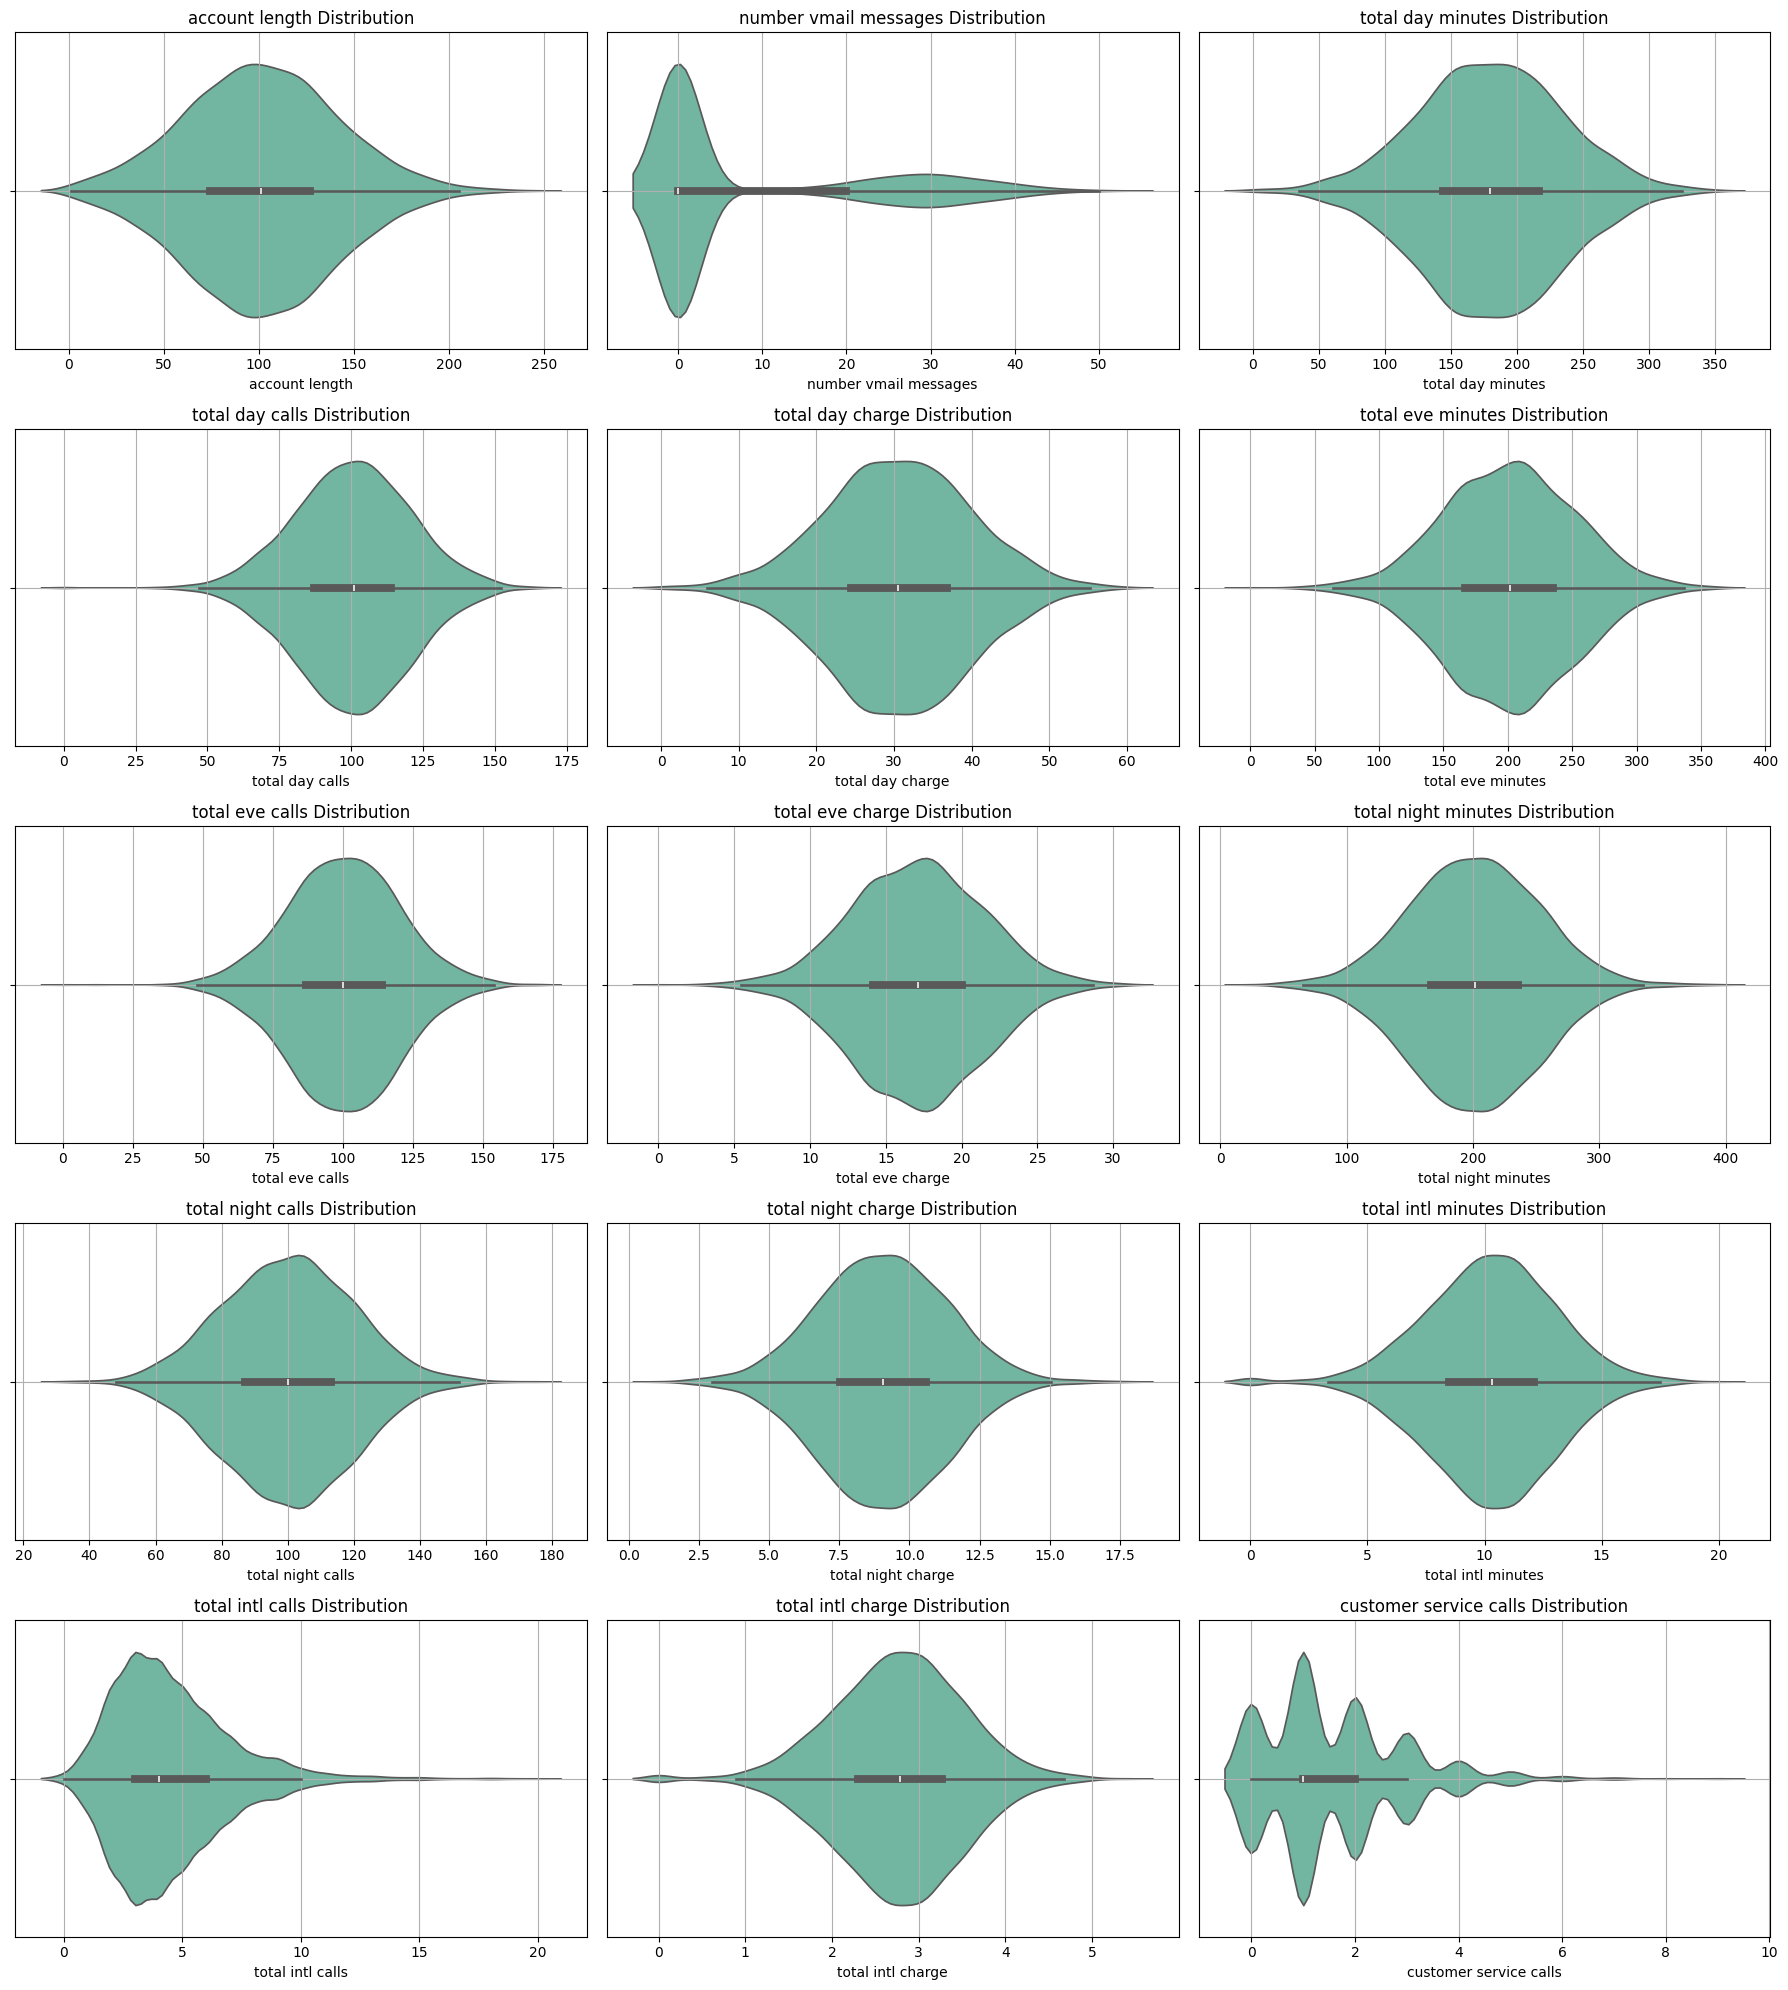

In [17]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numerical_features)//3, 3, figsize=(18, 20))
palette = sns.color_palette("Set2")
for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 3)
    sns.violinplot(x=col, data=df, ax=axes[row, col_idx], palette=palette)
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].grid(True)

if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

We see that out of 15 numerical features, 3 features are not distributed normally, namely:

- number vmail messages
- total intl calls
- customer service calls

We can proceed in two ways:
1. Leave them as it is. Then only use tree-based models (Random Forest) since models like Logistic Regression, Naive Bayes, SVM etc assume normally distributed features.
2. Apply transformations so that we are free to use most of the models.

We will be applying transformations in the **feature engineering** step.

### Distribution of categorical features

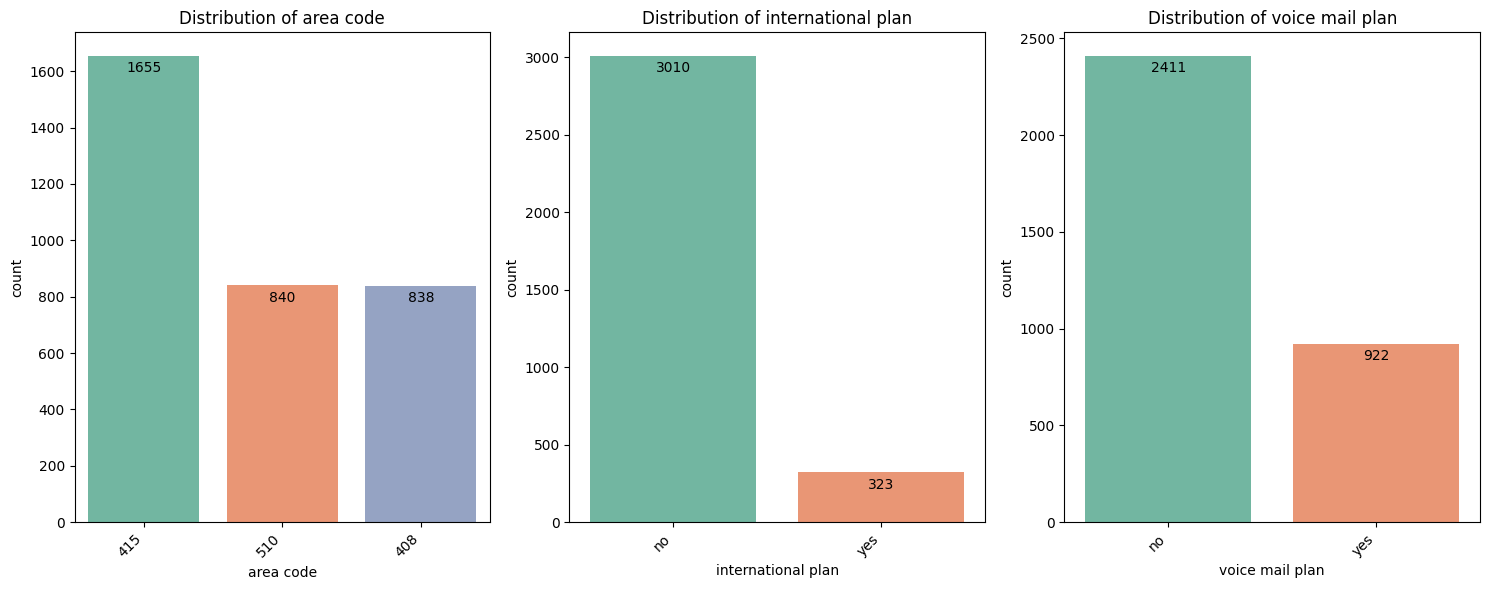

In [18]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('state')

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.flatten()
palette = sns.color_palette("Set2")
for i, feature in enumerate(categorical_features[:10]):
    plot = sns.countplot(x=df[feature], ax=axs[i], order=df[feature].value_counts().index, palette=palette)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, -9), textcoords = 'offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Correlation Matrix for Numerical Features

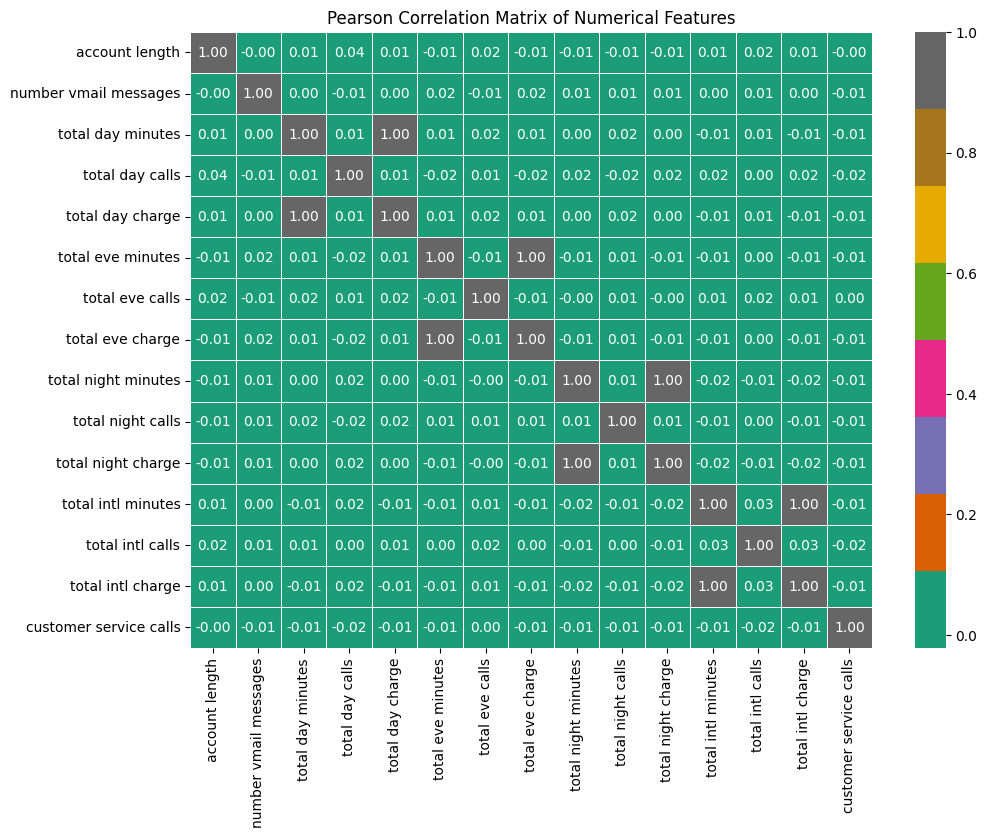

In [19]:
# correlation of numerical variables
pearson_correlation_matrix = df[numerical_features].corr(method='pearson') # (good for linear relationships)

plt.figure(figsize=(11, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f",cmap='Dark2',linewidths=0.5)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

We can see that we have few numerical features that are highly correlated:
- total day minutes & total day charge (100%)
- total eve minutes & total eve charge (100%)
- total night minutes & total night charge (100%)
- total intl minutes & total intl charge (100%)

We need to exclude some to avoid multi-collinearity. This will be done in **Feature selection** step.

## Feature Engineering

- transform non-normally distributed features
- perform train-test split
- Encoding Categorical Features
- Scaling Numerical Features

### Transform non-normally distributed features

We saw in EDA step that out of 15 numerical features, 3 features are not distributed normally, namely:

- number vmail messages
- total intl calls
- customer service calls

#### number vmail messages

The distribution shows Zero-Inflation (72% of values are 0) and remaining 28% being normally distributed. We can try various things here like:

1. Binning

We will be doing Binning.

In [23]:
# Binning the 'number vmail messages' column into 2 bins: 0-20, 20+
bins = [0, 21, np.inf]
labels = ['Low', 'High']
df['binned_voicemail'] = pd.cut(df['number vmail messages'], bins=bins, labels=labels, right=False)


#### total intl calls

Original distribution is right-skewed. We can try multiple transformations here like:

1. Logarithmic Transformation
2. Square Root Transformation

We will be doing logarithmic transformation, particularly **log (1+x)**, to avoid log 0 errors.

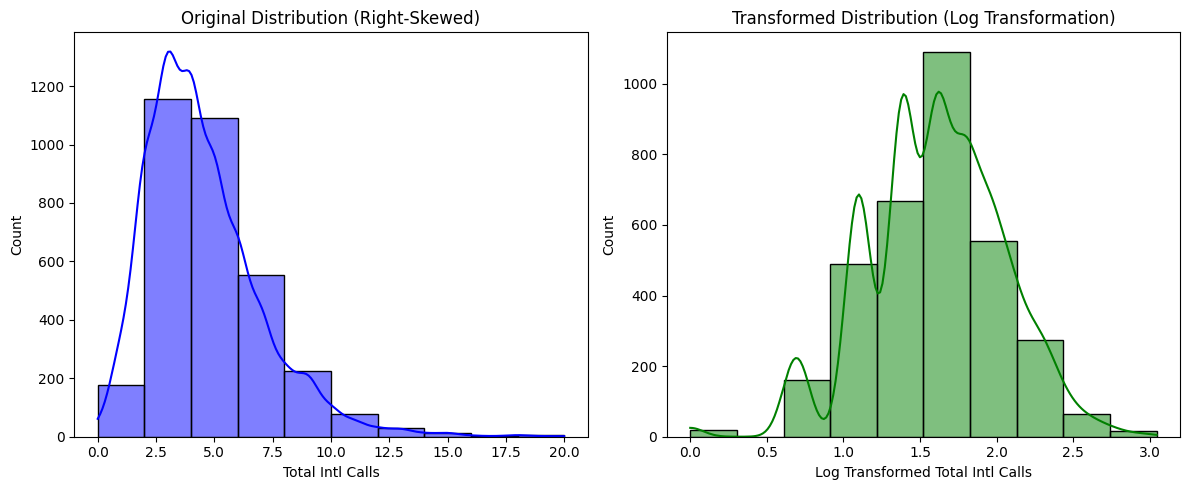

In [24]:
# Plot the original distribution (before transformation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['total intl calls'], bins=10, kde=True, color='blue')
plt.title('Original Distribution (Right-Skewed)')
plt.xlabel('Total Intl Calls')

# Apply log transformation to reduce skewness (adding 1 to avoid log(0))
df['total_intl_calls_log'] = np.log1p(df['total intl calls'])

# Plot the transformed distribution (after log transformation)
plt.subplot(1, 2, 2)
sns.histplot(df['total_intl_calls_log'], bins=10, kde=True, color='green')
plt.title('Transformed Distribution (Log Transformation)')
plt.xlabel('Log Transformed Total Intl Calls')

plt.tight_layout()
plt.show()

#### customer service calls

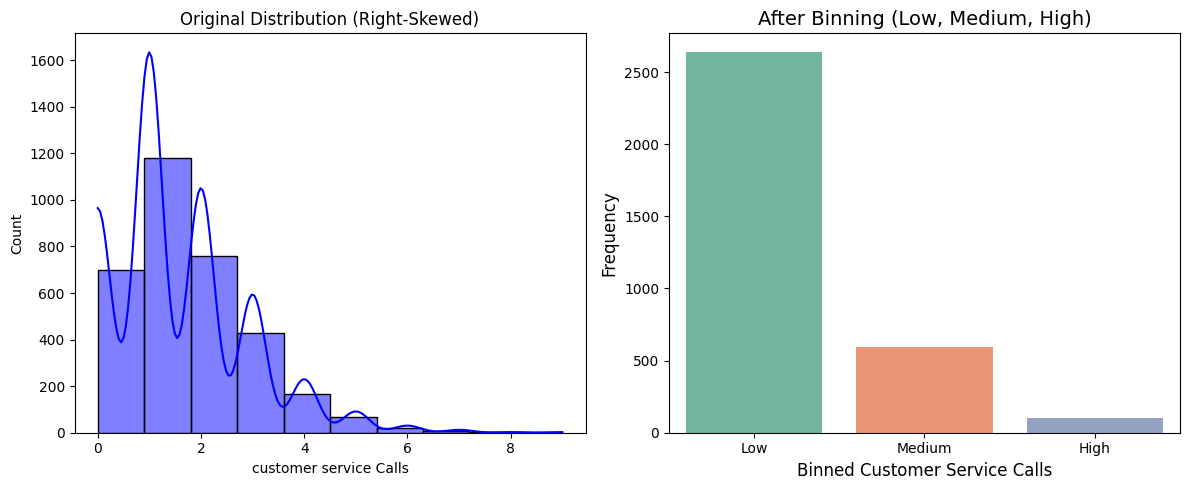

In [25]:
# Plot the original distribution (before transformation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['customer service calls'], bins=10, kde=True, color='blue')
plt.title('Original Distribution (Right-Skewed)')
plt.xlabel('customer service Calls')

# Binning the 'customer service calls' column into 3 bins: 0-2, 3-4, 4+
bins = [0, 3, 5, np.inf]
labels = ['Low', 'Medium', 'High']
df['binned_customer_service_calls'] = pd.cut(df['customer service calls'], bins=bins, labels=labels, right=False)

# Binned Distribution Plot
plt.subplot(1, 2, 2)
sns.countplot(x='binned_customer_service_calls', data=df, palette='Set2')
plt.title('After Binning (Low, Medium, High)', fontsize=14)
plt.xlabel('Binned Customer Service Calls', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
df[['binned_customer_service_calls', 'customer service calls']]

,binned_customer_service_calls,customer service calls
0,Low,1
1,Low,1
2,Low,0
3,Low,2
4,Medium,3
...,...,...
3328,Low,2
3329,Medium,3
3330,Low,2
3331,Low,2


In [27]:
df.drop(columns=['number vmail messages', 'total intl calls',
                 'customer service calls'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   object  
 1   account length                 3333 non-null   int64   
 2   area code                      3333 non-null   object  
 3   international plan             3333 non-null   object  
 4   voice mail plan                3333 non-null   object  
 5   total day minutes              3333 non-null   float64 
 6   total day calls                3333 non-null   int64   
 7   total day charge               3333 non-null   float64 
 8   total eve minutes              3333 non-null   float64 
 9   total eve calls                3333 non-null   int64   
 10  total eve charge               3333 non-null   float64 
 11  total night minutes            3333 non-null   float64 
 12  total night calls              333

### Creating New Columns

Using features such as total day minutes and total day charge (which are 100%) we can create new features like **total day charge per minute**.

In [28]:
df['total_day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['total_eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']
df['total_night_charge_per_minute'] = df['total night charge'] / df['total night minutes']
df['total_intl_charge_per_minute'] = df['total intl charge'] / df['total intl minutes']
df.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl charge,churn,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
0,KS,128,415,no,yes,265.1,110,45.07,197.4,99,...,10.0,2.70,False,High,1.386294,Low,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,no,yes,161.6,123,27.47,195.5,103,...,13.7,3.70,False,High,1.386294,Low,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,no,no,243.4,114,41.38,121.2,110,...,12.2,3.29,False,Low,1.791759,Low,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,yes,no,299.4,71,50.90,61.9,88,...,6.6,1.78,False,Low,2.079442,Low,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,yes,no,166.7,113,28.34,148.3,122,...,10.1,2.73,False,Low,1.386294,Medium,0.170006,0.085030,0.044997,0.270297


### Why perform train-test split first and then encode/scale?

**Key Reason: Avoid Data Leakage**
- If you scale the entire dataset before splitting it, the scaling process will use information from the test data (e.g., the mean and standard deviation of the entire dataset), which can lead to data leakage. This happens because the test set is supposed to be "unseen" during training, and scaling before splitting violates this principle by allowing the model to "see" some information from the test set indirectly. This can lead to over-optimistic performance metrics, as the model has already been influenced by the data it's supposed to predict on.

**Correct Process:**
1. Split your dataset into training and testing sets.
- Use something like train_test_split() to keep your test set separate.

2. Fit the scaler (e.g., StandardScaler, MinMaxScaler, RobustScaler, etc.) on the training data only.

- Calculate the mean and standard deviation (for standardization) or the minimum and maximum values (for normalization) based solely on the training data.

3. Transform both the training and test data using the scaler that was fitted on the training data.

- Apply the same scaling transformation to the test data, but do not fit the scaler again on the test data. Simply use the parameters (mean, standard deviation, etc.) calculated from the training set.

In [30]:
# Example
scale_then_split = df[['total day minutes', 'total day calls']]
scale_then_split = scale_then_split.reset_index()
scale_then_split.head()

,index,total day minutes,total day calls
0,0,265.1,110
1,1,161.6,123
2,2,243.4,114
3,3,299.4,71
4,4,166.7,113


In [31]:
# Apply Robust Scaler only on the specified columns
scaler = RobustScaler()
columns_to_scale = ['total day minutes', 'total day calls']
scale_then_split[columns_to_scale] = scaler.fit_transform(scale_then_split[columns_to_scale])
scale_then_split.head()

,index,total day minutes,total day calls
0,0,1.178817,0.333333
1,1,-0.244842,0.814815
2,2,0.880330,0.481481
3,3,1.650619,-1.111111
4,4,-0.174691,0.444444


In [32]:
split_then_scale = df[['total day minutes', 'total day calls']]
split_then_scale = split_then_scale.reset_index()
split_then_scale.head()

,index,total day minutes,total day calls
0,0,265.1,110
1,1,161.6,123
2,2,243.4,114
3,3,299.4,71
4,4,166.7,113


In [33]:
# Step 1: Train-test split
X_train, X_test = train_test_split(split_then_scale, test_size=0.2, random_state=42)

# Step 2: Fit the scaler on the training data
scaler = RobustScaler()
columns_to_scale = ['total day minutes', 'total day calls']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
print(X_train.shape)
X_train.head()

(2666, 3)


,index,total day minutes,total day calls
817,817,-1.145399,-0.346154
1373,1373,-0.919603,0.153846
679,679,0.591173,-0.884615
56,56,-0.715703,-0.115385
1993,1993,0.507698,-0.192308


In [35]:
# Step 3: Apply the same transformation to the test data
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
print(X_test.shape)
X_test.head()

(667, 3)


,index,total day minutes,total day calls
438,438,-2.456807,-3.896450
2674,2674,-2.465403,-3.860947
1345,1345,-2.485833,-4.034024
1957,1957,-2.445983,-3.917160
2148,2148,-2.458867,-3.883136


In [36]:
scale_then_split[scale_then_split['index'] == 438]

,index,total day minutes,total day calls
438,438,-0.335626,-0.296296


### Perform Train-Test Split

In [37]:
# Step 1: Define features (X) and target (y)
X = df.drop(columns=['churn'])  # Drop the target column from the feature set
y = df['churn']  # Target variable

# Step 2: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Display the shapes of the resulting sets
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Training set size:  (2666, 23)
Test set size:  (667, 23)


### Encoding categorical features

#### Direct Mapping

In [38]:
df.select_dtypes(include=['object','category']).columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls'],
      dtype='object')

In [39]:
## 1. churn
y_train = y_train.map({True: 1, False: 0})
y_test = y_test.map({True: 1, False: 0})
y_train.head()

,churn
3286,0
86,1
1349,0
1649,0
3000,0


In [40]:
## 2. international plan
X_train['international plan'] = X_train['international plan'].map({'no': 0, 'yes': 1})
X_test['international plan'] = X_test['international plan'].map({'no': 0, 'yes': 1})
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,415,0,yes,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,408,0,no,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,510,0,yes,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,408,0,no,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,510,0,no,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [41]:
## 3.voice mail plan
X_train['voice mail plan'] = X_train['voice mail plan'].map({'no': 0, 'yes': 1})
X_test['voice mail plan'] = X_test['voice mail plan'].map({'no': 0, 'yes': 1})
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,415,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,408,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,510,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,408,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,510,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


#### Frequency Encoding

In [42]:
## 4. area code
pd.concat([X_train['area code'], y_train], axis=1).groupby('area code').agg(churn_rate=('churn', 'mean'))

,churn_rate
area code,
408,0.136095
415,0.148204
510,0.146789


In [43]:
X_train['area code'].value_counts(normalize=True)

,proportion
area code,
415,0.501125
408,0.253563
510,0.245311


Frequency Encoding (since 415 appears 50% of the time and the others 25%).

**No Clear Relationship to Target**: Use frequency encoding when you don't have strong prior knowledge or evidence that the categorical feature has a direct relationship with the target variable.

Here, you can encode each area code based on its frequency in the dataset.

In [44]:
# Step 1: Calculate frequency encoding based on the training set
freq_encoding_area_code = X_train['area code'].value_counts(normalize=True)

# Step 2: Map the frequencies back to the training and test sets
X_train['area code'] = X_train['area code'].map(freq_encoding_area_code)
X_test['area code'] = X_test['area code'].map(freq_encoding_area_code)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


#### Target Encoding

In [45]:
## 5. state
pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn', 'mean')).sort_values(by='churn_rate', ascending=False)

,churn_rate
state,
CA,0.285714
MD,0.267857
NJ,0.264151
SC,0.260870
MI,0.228070
WA,0.224490
NV,0.218182
MS,0.215686
MT,0.214286


In [46]:
# Step 1: Calculate frequency encoding based on the training set
target_encoding_state = pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn', 'mean'))

# Step 2: Map the frequencies back to the training and test sets
X_train['state'] = X_train['state'].map(target_encoding_state['churn_rate'])
X_test['state'] = X_test['state'].map(target_encoding_state['churn_rate'])
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


- State is a categorical column with **high cardinality**: 51 Unique values

**Extra Info**: When you have high cardinality, some other things you can try are:
1. Frequency Encoding:
This method assigns the frequency of each category as the encoded value. It helps capture the representation of each state without increasing dimensionality.

2. Hashing Encoding:
This is useful for very high-cardinality data, as it hashes the categories into a fixed number of buckets.

3. One-Hot Encoding with Thresholding:
For high cardinality, One-Hot Encoding could be expensive (increasing feature dimensionality). However, you can limit One-Hot Encoding to the most frequent states (e.g., top n states), and group the remaining states into an "Other" category.

In [47]:
## 6. binned_voicemail
pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail').agg(churn_rate=('churn', 'mean'))

,churn_rate
binned_voicemail,
Low,0.163205
High,0.086957


Customers with lower voicemail have almost double the churn rate as compared to customers who send high voicemails. This could be because of variety of reasons like **less engagement, technological issues, preference to alternate communication channels (texts, emails etc)** etc.

In [48]:
# Step 1: Calculate target encoding based on the training set
target_encoding_binned_voicemail = pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail').agg(churn_rate=('churn', 'mean'))

# Step 2: Map the churn rate back to the training and test sets
X_train['binned_voicemail'] = X_train['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype(float)
X_test['binned_voicemail'] = X_test['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype(float)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,0.086957,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,0.163205,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,0.086957,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,0.163205,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,0.163205,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [49]:
## 7. binned_customer_service_calls
pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn', 'mean'))

,churn_rate
binned_customer_service_calls,
Low,0.110636
Medium,0.210417
High,0.650000


Customers with High customer service calls have **5x more Churn Rate** as compared to customers who have Low or Medium customer service calls. This implies that customers who are continuosly seeking support are highly likely to churn.

In [50]:
# Step 1: Calculate target encoding based on the training set
target_encoding_binned_csc = pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn', 'mean'))

# Step 2: Map the churn rate back to the training and test sets
X_train['binned_customer_service_calls'] = X_train['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype(float)
X_test['binned_customer_service_calls'] = X_test['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype(float)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,0.086957,2.197225,0.110636,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,0.163205,1.791759,0.210417,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,0.086957,1.386294,0.110636,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,0.163205,1.609438,0.110636,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,0.163205,1.609438,0.210417,0.169982,0.085020,0.045005,0.270345


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 3286 to 2762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          2666 non-null   float64
 1   account length                 2666 non-null   int64  
 2   area code                      2666 non-null   float64
 3   international plan             2666 non-null   int64  
 4   voice mail plan                2666 non-null   int64  
 5   total day minutes              2666 non-null   float64
 6   total day calls                2666 non-null   int64  
 7   total day charge               2666 non-null   float64
 8   total eve minutes              2666 non-null   float64
 9   total eve calls                2666 non-null   int64  
 10  total eve charge               2666 non-null   float64
 11  total night minutes            2666 non-null   float64
 12  total night calls              2666 non-null   int

### Scaling numerical features

The **Robust Scaler** uses the median and the interquartile range (IQR) for scaling.
- Benefits: It is less sensitive to outliers because it scales the data according to the range between the 25th percentile (Q1) and the 75th percentile (Q3).
- Use Case: This is often the best choice when you have outliers, as it minimizes their influence.

In [52]:
exclude_columns = ['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls', 'total_day_charge_per_minute',
                   'total_eve_charge_per_minute', 'total_night_charge_per_minute',
                   'total_intl_charge_per_minute']
columns_to_scale = X_train.columns.difference(exclude_columns)

# Apply Robust Scaler only on the specified columns
scaler = RobustScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,0.094340,0.501125,0,1,0.560632,0.148148,0.561262,0.310586,0.333333,...,-0.626230,0.777778,0.783505,0.086957,1.050340,0.110636,0.170014,0.085014,0.045013,0.270229
86,0.160714,-0.132075,0.253563,0,0,-0.294057,0.148148,-0.294379,-0.680930,0.037037,...,-0.167213,-0.638889,-0.639175,0.163205,0.325798,0.210417,0.169981,0.085032,0.044989,0.270000
1349,0.122449,-0.566038,0.245311,0,1,-0.520783,0.222222,-0.520825,-0.562892,0.185185,...,0.281967,-1.305556,-1.309278,0.086957,-0.398744,0.110636,0.170014,0.085031,0.045000,0.269643
1649,0.127660,0.547170,0.253563,0,0,-1.523875,-0.555556,-1.524464,-0.115824,0.370370,...,-0.432787,0.027778,0.030928,0.163205,0.000000,0.110636,0.170029,0.084997,0.045015,0.270192
3000,0.264151,-0.264151,0.245311,0,0,0.603229,0.296296,0.603316,-1.086684,-0.518519,...,1.304918,1.166667,1.175258,0.163205,0.000000,0.210417,0.169982,0.085020,0.045005,0.270345


## Feature Selection

- remove highly correlated features

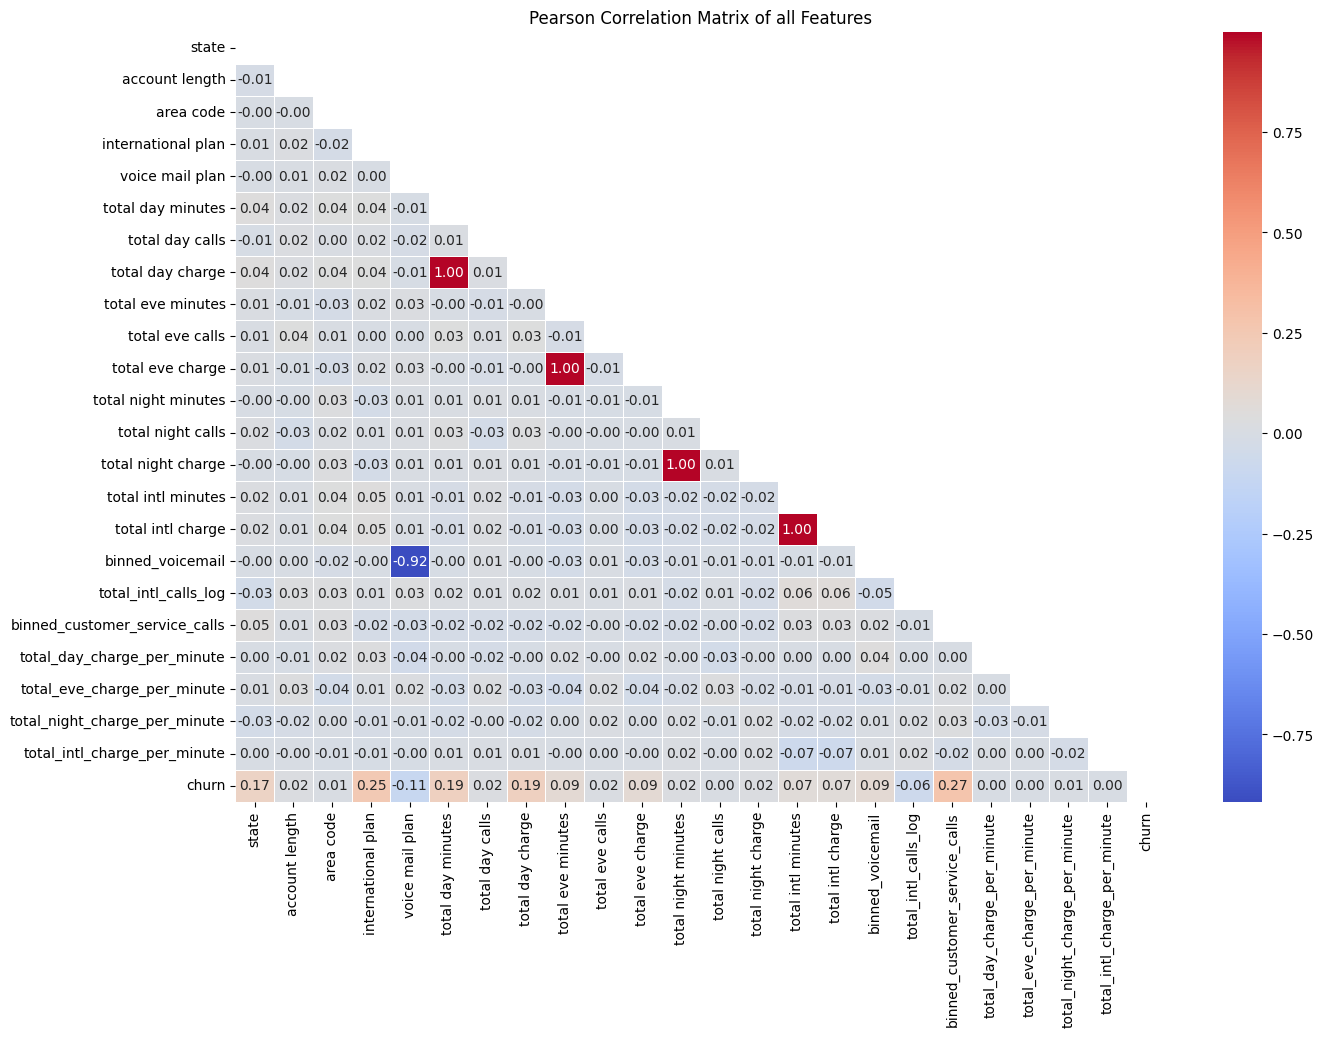

In [53]:
pearson_correlation_matrix = pd.concat([X_train, y_train], axis=1).corr(method='pearson')

mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            annot_kws={"fontsize": 10}, mask=mask)
plt.title('Pearson Correlation Matrix of all Features')
plt.show()

From the heatmap, we can see that following features are highly correlated:

- total day minutes & total day charge (100%)
- total eve minutes & total eve charge (100%)
- total night minutes & total night charge (100%)
- total intl minutes & total intl charge (100%)
- binned_voicemail & voice mail plan (93%)

Deciding which correlated features to keep and which to drop is an essential part of feature selection in machine learning. Here are several strategies you can employ to make that decision:

1. **Correlation Analysis Threshold:** Set a correlation threshold to identify pairs of correlated features.
- Visualize Correlation Matrix: Use a heatmap to visualize correlations among features, making it easier to spot highly correlated pairs.
2. **Domain Knowledge Relevance:** Retain features that have clear significance based on domain knowledge. If a feature has a strong theoretical basis for being important, it may be worth keeping despite correlation.
- Business Impact: Consider which features are more relevant to the business context or the specific problem you are solving.
3. **Feature Importance from Models Tree-based Models:** Use models like Random Forest that provide feature importance scores. Keep features with higher importance scores.
- Lasso Regression: Use L1 regularization (Lasso) to help shrink coefficients of less important features to zero, effectively selecting a subset of features.
4. **Redundancy Consideration Variability:** Assess how much unique information each feature provides. If two features are very similar and one offers negligible additional information, you might drop the one with lower variance.
- Performance Impact: Perform cross-validation with and without the correlated features to see if dropping one affects model performance significantly.

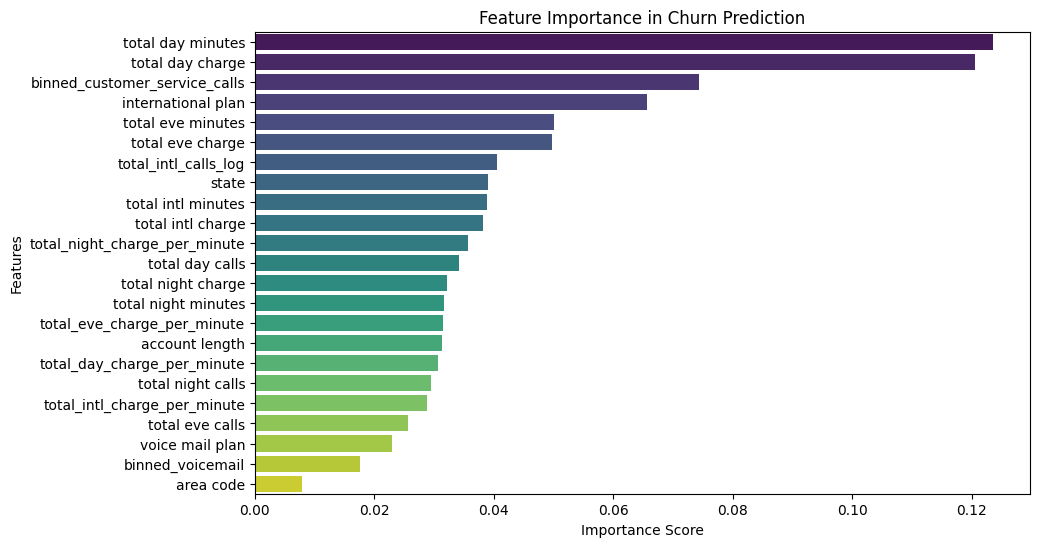

In [54]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

# Get feature importance
importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [55]:
variance = X_train.var()
variance.sort_values(ascending=False)

,0
total_intl_calls_log,6.164898e-01
total intl charge,6.090785e-01
total intl minutes,6.065848e-01
account length,5.658598e-01
total day charge,5.583341e-01
total day minutes,5.577229e-01
total eve minutes,5.549527e-01
total eve charge,5.536680e-01
total day calls,5.493989e-01
total eve calls,5.487704e-01


Let's drop minutes columns, binned_voicemail and all the 4 columns we created.

In [56]:
columns_to_drop = ['total intl minutes', 'total day minutes', 'total eve minutes',
                   'total night minutes', 'binned_voicemail', 'total_intl_charge_per_minute',
                   'total_day_charge_per_minute', 'total_night_charge_per_minute',
                   'total_eve_charge_per_minute']

X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl charge,total_intl_calls_log,binned_customer_service_calls
3286,0.152542,0.094340,0.501125,0,1,0.148148,0.561262,0.333333,0.311227,-0.148148,-0.626230,0.783505,1.050340,0.110636
86,0.160714,-0.132075,0.253563,0,0,0.148148,-0.294379,0.037037,-0.678804,-0.592593,-0.167213,-0.639175,0.325798,0.210417
1349,0.122449,-0.566038,0.245311,0,1,0.222222,-0.520825,0.185185,-0.560902,-0.037037,0.281967,-1.309278,-0.398744,0.110636
1649,0.127660,0.547170,0.253563,0,0,-0.555556,-1.524464,0.370370,-0.115301,1.444444,-0.432787,0.030928,0.000000,0.110636
3000,0.264151,-0.264151,0.245311,0,0,0.296296,0.603316,-0.518519,-1.084525,-0.629630,1.304918,1.175258,0.000000,0.210417


## Balance the class

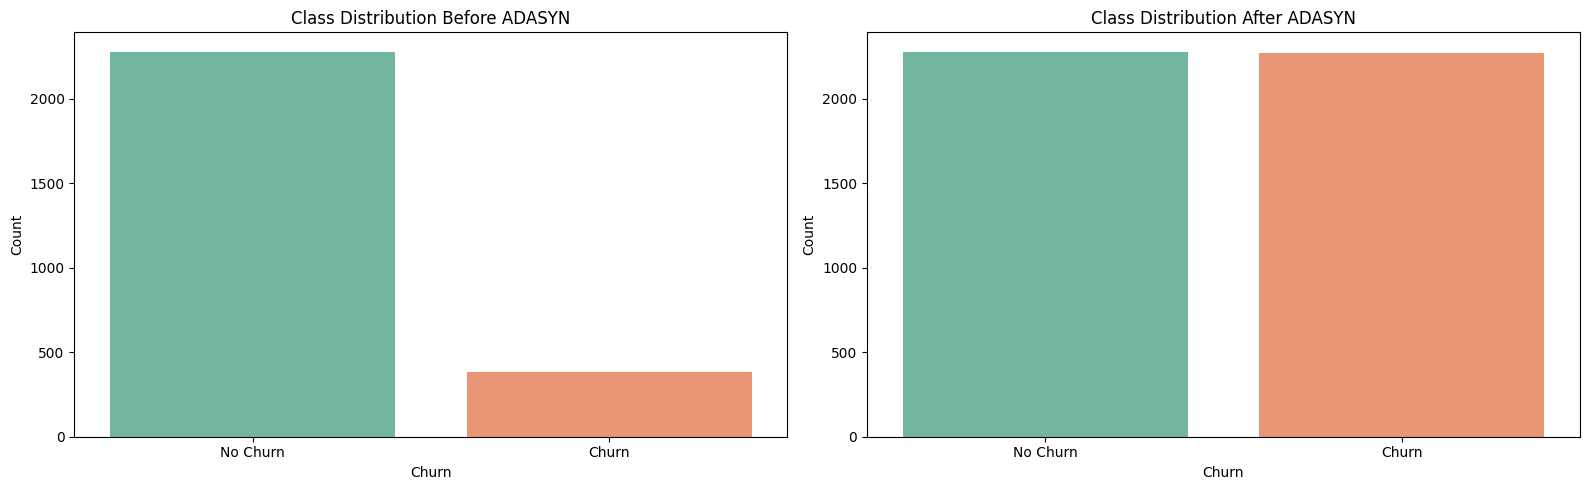

,Before,After
churn,,
0,2280,2280
1,386,2272


In [57]:
from imblearn.over_sampling import ADASYN

# Creating subplots for class distribution before and after ADASYN
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting class distribution before ADASYN
sns.countplot(x='churn', data=pd.concat([X_train, y_train], axis=1), palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution Before ADASYN')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'])

# Applying ADASYN to balance the classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Plotting class distribution after ADASYN
sns.countplot(x=y_resampled, palette='Set2', ax=axes[1])
axes[1].set_title('Class Distribution After ADASYN')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# Creating a DataFrame to compare before and after
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_resampled).value_counts()

# Creating a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Before': before_count,
    'After': after_count
})

comparison_df

## Model Training & Evaluation

In a churn dataset:

1. **Positive Class**: Churn
2. **Negative Class**: Non-Churn

Let's define different metrics:

- **Accuracy:** How many customers were correctly predicted (both churned and non-churned).
$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$
- **Precision:** Out of customers predicted to churn, how many actually churned.
$Precision = \frac{TP}{TP + FP}$
- **Recall:** Out of customers who churned, how many were correctly predicted.
$Recall = \frac{TP}{TP + FN}$
- **F1 Score:** A balanced measure of precision and recall, useful for imbalanced datasets.
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
- **ROC AUC:** How well the model separates churned from non-churned customers, irrespective of a threshold.

Each of these metrics provides a different perspective on model performance, helping you decide which model works best depending on business needs.

1. **When Precision is Important**
- Scenario: A company wants to minimize false positives, i.e., avoid incorrectly predicting that a customer will churn when they won’t. This could be because the company plans to offer costly retention efforts (e.g., discounts, special deals, personalized service) to predicted churners. Offering these incentives to non-churning customers would be wasteful and negatively impact profitability.

- Why Precision is Important: The company wants to be certain that when they target a customer as likely to churn, there is a high probability that the customer is truly at risk.
- When to prioritize precision:

i). If the cost of intervening with a non-churner is high.

ii). If churn-prevention actions are expensive or involve significant resources.

iii). If the company wants to maintain customer relationships without overwhelming the customers with unnecessary retention offers.

2. **When Recall is Important**
- Scenario: A company wants to identify as many churners as possible, even if it means more false positives (predicting churn for non-churners). Here, the company prioritizes catching as many actual churners as possible because the long-term value of keeping churned customers is high, and missing a churner is costly.

- Why Recall is Important: Missing a churned customer (false negative) means losing a customer who could have been saved with an appropriate retention effort.
- When to prioritize recall:

i). If the cost of losing a churned customer is high.

ii). If the company prefers to overestimate churn risk rather than miss out on potential churners.

iii). If customer retention is crucial, and catching every potential churner is more important than offering retention actions to some non-churners.

In [58]:
# Defining classification models to evaluate, including gradient boosting models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, verbose=0),
    'Random Forest': RandomForestClassifier(random_state=42, verbose=0),
    'Support Vector Classifier': SVC(probability=True, verbose=False),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()  # Naive Bayes classifier
}

# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the evaluation metrics for each model
metrics_comparison = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []}

# Train models with 5-fold cross-validation on training data, and evaluate on test data
num_models = len(models)
for i, (model_name, model) in enumerate(models.items()):
    # Perform cross-validation on training data
    accuracy_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy').mean()
    precision_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='precision').mean()
    recall_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='recall').mean()
    f1_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='f1').mean()
    roc_auc_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='roc_auc').mean()

    # Train the model on the full resampled training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate test set evaluation metrics
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

    # Append the results to the metrics_comparison dictionary
    metrics_comparison['Model'].append(model_name)
    metrics_comparison['Accuracy'].append(f"CV: {accuracy_cv:.4f} | Test: {accuracy_test:.4f}")
    metrics_comparison['Precision'].append(f"CV: {precision_cv:.4f} | Test: {precision_test:.4f}")
    metrics_comparison['Recall'].append(f"CV: {recall_cv:.4f} | Test: {recall_test:.4f}")
    metrics_comparison['F1 Score'].append(f"CV: {f1_cv:.4f} | Test: {f1_test:.4f}")
    metrics_comparison['ROC AUC'].append(f"CV: {roc_auc_cv:.4f} | Test: {roc_auc_test:.4f}")

    # Display percentage completion
    percent_complete = (i + 1) / num_models * 100
    print(f"Completed {percent_complete:.2f}% of evaluations.")

Completed 16.67% of evaluations.
Completed 33.33% of evaluations.
Completed 50.00% of evaluations.
Completed 66.67% of evaluations.
Completed 83.33% of evaluations.
Completed 100.00% of evaluations.


In [59]:
metrics_comparison = pd.DataFrame(metrics_comparison)
metrics_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,CV: 0.7695 | Test: 0.7526,CV: 0.7795 | Test: 0.3411,CV: 0.7504 | Test: 0.7526,CV: 0.7646 | Test: 0.4695,CV: 0.8369 | Test: 0.8239
1,Random Forest,CV: 0.9545 | Test: 0.9040,CV: 0.9616 | Test: 0.7089,CV: 0.9467 | Test: 0.5773,CV: 0.9541 | Test: 0.6364,CV: 0.9876 | Test: 0.8728
2,Support Vector Classifier,CV: 0.8858 | Test: 0.8471,CV: 0.9050 | Test: 0.4793,CV: 0.8618 | Test: 0.5979,CV: 0.8826 | Test: 0.5321,CV: 0.9539 | Test: 0.8371
3,Decision Tree,CV: 0.8996 | Test: 0.8576,CV: 0.8856 | Test: 0.5088,CV: 0.9177 | Test: 0.5979,CV: 0.9013 | Test: 0.5498,CV: 0.8996 | Test: 0.7498
4,K-Nearest Neighbors,CV: 0.8469 | Test: 0.7376,CV: 0.7669 | Test: 0.3050,CV: 0.9960 | Test: 0.6289,CV: 0.8666 | Test: 0.4108,CV: 0.9590 | Test: 0.7437
5,Naive Bayes,CV: 0.7715 | Test: 0.8351,CV: 0.8598 | Test: 0.4496,CV: 0.6488 | Test: 0.5979,CV: 0.7388 | Test: 0.5133,CV: 0.8449 | Test: 0.7970


Accuracy: 0.904047976011994
Precision: 0.7088607594936709
Recall: 0.5773195876288659
F1 Score: 0.6363636363636364
ROC AUC: 0.8727979743172364
True Negatives: 547, False Positives: 23, False Negatives: 41, True Positives: 56


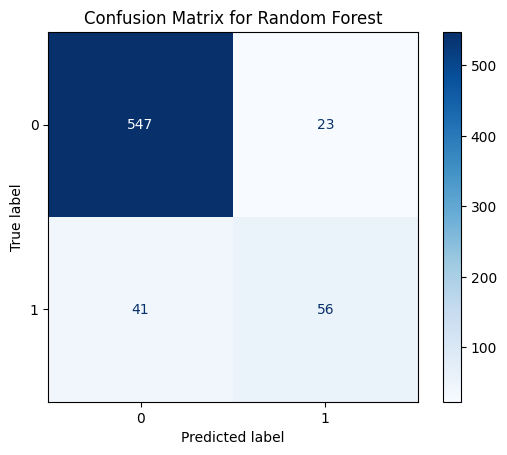

In [60]:
best_model_name = 'Random Forest'
best_model = models[best_model_name]

# Predict on the test set
y_pred_test = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Optionally, print additional metrics for clarity
tn, fp, fn, tp = cm.ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot(cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

## Hyperparameter Tuning

Let's tune hyperparameters of Random Forest to see if it performs better on the test set.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found for Random Forest: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Accuracy: 0.9190404797601199
Precision: 0.864406779661017
Recall: 0.5257731958762887
F1 Score: 0.6538461538461539
ROC AUC: 0.8917525773195877
True Negatives: 562, False Positives: 8, False Negatives: 46, True Positives: 51


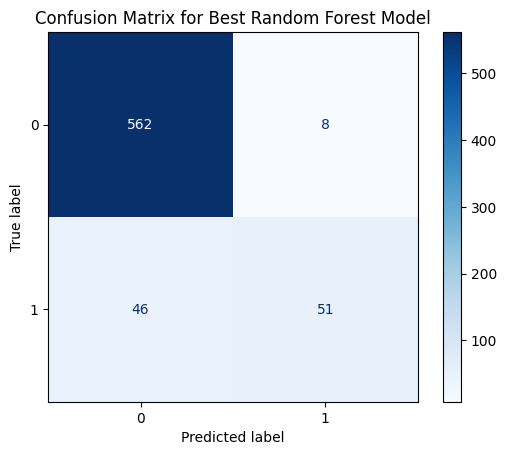

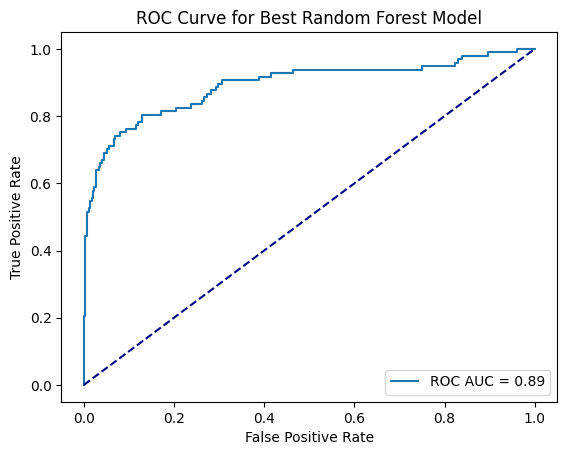

In [61]:
# Define the expanded parameter grid for RandomizedSearchCV for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500, 1000],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Whether to use bootstrap samples
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning with the expanded parameter distribution
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # You can adjust the number of iterations
    cv=5,
    scoring='f1',  # F1 score is a good metric for imbalanced datasets
    verbose=1,
    n_jobs=-1,
    random_state=42  # Set random_state for reproducibility
)

# Fit the model on the training data
random_search_rf.fit(X_train, y_train)

# Get the best parameters from the search
best_params_rf = random_search_rf.best_params_
print(f"Best parameters found for Random Forest: {best_params_rf}")

# Train the best Random Forest model with the optimal parameters
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf)
recall_rf = recall_score(y_test, y_pred_test_rf)
f1_rf = f1_score(y_test, y_pred_test_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Display the metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Optionally, print additional metrics for clarity
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f'True Negatives: {tn_rf}, False Positives: {fp_rf}, False Negatives: {fn_rf}, True Positives: {tp_rf}')

# Display the confusion matrix
cmd_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
cmd_rf.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Best Random Forest Model')
plt.show()

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'ROC AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc='lower right')
plt.show()

## Save the Best Model

In [62]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

## Make predictions on New Data

In [70]:
train_data = pd.DataFrame({
    'state': ['CA', 'NY', 'TX', 'CA', 'FL', 'NJ', 'IL', 'MI', 'VA', 'WA'],
    'phone number': ['352-2270', '123-4567', '234-5678', '345-6789', '456-7890', '567-8901', '678-9012', '789-0123', '890-1234', '901-2345'],
    'account length': [106, 200, 150, 80, 120, 210, 175, 190, 110, 135],
    'area code': [415, 408, 510, 415, 415, 408, 510, 510, 415, 408],
    'number vmail messages': [30, 0, 15, 25, 5, 10, 0, 35, 0, 20],
    'total day minutes': [220.1, 150.5, 300.2, 180.3, 250.7, 100.8, 275.9, 190.0, 210.4, 280.2],
    'total day calls': [105, 110, 95, 130, 120, 100, 85, 115, 105, 99],
    'total day charge': [37.42, 25.58, 51.03, 30.67, 42.62, 17.13, 46.90, 32.30, 35.77, 47.63],
    'total eve minutes': [222.2, 300.5, 150.3, 250.9, 190.6, 230.4, 200.2, 180.1, 215.9, 240.0],
    'total eve calls': [109, 85, 110, 90, 100, 105, 120, 99, 95, 110],
    'total eve charge': [18.89, 25.54, 12.78, 21.33, 16.20, 19.58, 17.02, 15.31, 18.35, 20.40],
    'total night minutes': [158.4, 200.3, 100.5, 150.7, 190.1, 130.2, 170.4, 210.5, 160.2, 180.0],
    'total night calls': [96, 100, 90, 110, 105, 120, 115, 89, 100, 95],
    'total night charge': [7.13, 9.01, 4.52, 6.78, 8.56, 5.86, 7.67, 9.47, 7.21, 8.10],
    'total intl minutes': [13.1, 12.0, 15.3, 10.5, 9.8, 14.6, 13.5, 8.9, 11.0, 12.4],
    'total intl calls': [8, 6, 5, 7, 4, 9, 10, 5, 6, 8],
    'total intl charge': [3.54, 3.24, 4.13, 2.84, 2.65, 3.94, 3.65, 2.40, 2.97, 3.35],
    'customer service calls': [0, 1, 2, 3, 2, 4, 0, 8, 1, 3],
    'international plan': ['no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'],
    'voice mail plan': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes']
})

In [72]:
encoding_state = {'CA': 0.5, 'NY': 0.3, 'TX': 0.7, 'FL': 0.4, 'NJ': 0.8, 'IL': 0.6, 'MI': 0.4, 'VA': 0.2, 'WA': 0.1}
encoding_area_code = {415: 1, 408: 2, 510: 3}
encoding_binned_csc = {'Low': 0.1, 'Medium': 0.3, 'High': 0.7}

# Preprocessing functions
def encode(X):
    X['international plan'] = X['international plan'].map({'no': 0, 'yes': 1})
    X['voice mail plan'] = X['voice mail plan'].map({'no': 0, 'yes': 1})
    X['state'] = X['state'].map(encoding_state)
    X['area code'] = X['area code'].map(encoding_area_code)
    X['binned_customer_service_calls'] = pd.cut(X['customer service calls'], bins=[-1, 3, 5, np.inf], labels=['Low', 'Medium', 'High'])
    X['binned_customer_service_calls'] = X['binned_customer_service_calls'].map(encoding_binned_csc)
    return X

def log_transform(X):
    X['total_intl_calls_log'] = np.log1p(X['total intl calls'])
    return X

# Columns to drop and scale
columns_to_drop = ['phone number', 'number vmail messages', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'customer service calls', 'total intl calls']
columns_to_scale = ['account length', 'total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge', 'total intl charge']

# Preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('encode', FunctionTransformer(encode)),
    ('log_transform', FunctionTransformer(log_transform)),
    ('drop_columns', FunctionTransformer(lambda df: df.drop(columns=columns_to_drop, errors='ignore'))),
    ('scaling', ColumnTransformer([('scale', RobustScaler(), columns_to_scale)], remainder='passthrough'))
])

In [74]:
# Fit the pipeline
preprocessing_pipeline.fit(train_data)

# Preprocess the examples data
preprocessed_examples = preprocessing_pipeline.transform(examples)

# Predict churn using the trained model
predictions = best_rf_model.predict(preprocessed_examples)

# Iterate through each prediction and print the result
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Customer {i+1} is predicted to churn.")
    else:
        print(f"Customer {i+1} is predicted to not churn.")

Customer 1 is predicted to churn.
Customer 2 is predicted to not churn.
Customer 3 is predicted to churn.
Customer 4 is predicted to not churn.
Customer 5 is predicted to not churn.
Customer 6 is predicted to churn.
Customer 7 is predicted to churn.
Customer 8 is predicted to churn.
Customer 9 is predicted to not churn.
Customer 10 is predicted to not churn.
